# Mushroom Dataset Introduction

"Mushroom Dataset mendeskripsikan karakter fisik dari 23 jenis Gilled Mushrooms dari Famili Agaricus dan Lepiota. Masing-masing spesies dapat diidentifikasi sebagai 'edible' (aman untuk dimakan), 'beracun', 'tidak diketahui', dan 'tidak direkomendasikan'. Pada dataset ini, dua kelas terakhir ('tidak diketahui' dan 'tidak direkomendasikan') dikombinasikan menjadi satu kelas. Di dalam petunjuk dan panduan umumnya, tidak ada aturan yang mudah untuk menentukan apakah sebuah jamur aman untuk dimakan atau tidak" -(https://archive.ics.uci.edu/ml/datasets/Mushroom)

Notebook ini berusaha menjelaskan bagaimana Mushroom Dataset dapat digunakan untuk mengklasifikasikan jamur menjadi dua kelas: "edible" (dapat dimakan) dan "poisonous" (beracun). Dataset terdiri dari 8124 observasi dengan 22 kolom yang menjelaskan karakter fisik dari sampel jamur.

Deskripsi dari masing-masing atribut dapat dijelaskan sebagai berikut:
```
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
```

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. Import Dataset

In [2]:
dataRaw = []
DataFile = open("dataset/agaricus-lepiota.data", "r")

while True:
    the_line = DataFile.readline()
    if len(the_line) == 0:
        break
  
    readData = the_line.split(",")
    for pos in range(len(readData)):
        if "\n" in readData[pos]:
            readData[pos] = readData[pos].replace("\n","")
    dataRaw.append(readData)

DataFile.close()

colsName_mushroom = ['class','cap-shape','cap-surface','cap-color', 'bruises','odor',
           'gill-attachment','gill-spacing','gill-size','gill-color',
           'stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring',
           'stalk-color-below-ring','veil-type','veil-color','ring-number',
           'ring-type','spore-print-color','population','habitat'
    ]

df = pd.DataFrame(
    data=dataRaw,
    columns=colsName_mushroom
)

df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6842,p,f,y,e,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
227,e,x,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,n,s,g
7490,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,y,c,l
4126,p,x,y,y,f,f,f,c,b,h,...,k,b,p,p,w,o,l,h,v,p
6041,p,f,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d


In [3]:
print(df.shape)
print(df['class'].value_counts())
df.isnull().sum()

(8124, 23)
e    4208
p    3916
Name: class, dtype: int64


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
for i in colsName_mushroom:
    print(i, len(df[i].unique()))
    
# veil-type column, unique value is only 1, therefore drop it
df = df.drop(columns=['veil-type'])

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


# 2. Preprocessing

Encoding

Setiap kolom pada dataset merupakan categorical attribute. Dari total 22 atribute, 6 merupakan binary variable dan sisanya nominal variable. Setiap kolom ditransformasikan ke dalam bentuk nominal angka menggunaka label encoder.

In [5]:
le = LabelEncoder()

label_encoded_mushroom_df = pd.DataFrame(columns=df.columns)

for col in df:
    label_encoded_mushroom_df[col] = le.fit_transform(df[col])

print(label_encoded_mushroom_df.shape)
label_encoded_mushroom_df.head()

(8124, 22)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# 3. Modelling

In [6]:
X = label_encoded_mushroom_df.drop('class', axis=1)
y = label_encoded_mushroom_df['class']

models = Pipeline([
    ('clf', None), 
])

search = GridSearchCV(
    models, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=21), 
    return_train_score=False, 
    scoring=['accuracy'],
    refit = 'accuracy',
    param_grid={
        'clf': [MultinomialNB(), RandomForestClassifier(), SVC(), LogisticRegression(max_iter=1000)]        
})

In [7]:
start = time.time()
search.fit(X, y)
print('total fitting time:', round((time.time() - start)/60,2), 'minute(s)')

total fitting time: 0.21 minute(s)


In [8]:
print('Best model:', search.best_params_)
model_comparison = pd.DataFrame(search.cv_results_)
model_comparison

Best model: {'clf': RandomForestClassifier()}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,split5_test_accuracy,split6_test_accuracy,split7_test_accuracy,split8_test_accuracy,split9_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.005882,0.000827,0.002918,0.002770,MultinomialNB(),{'clf': MultinomialNB()},0.809348,0.822878,0.794588,0.805658,0.790640,0.802956,0.806650,0.817734,0.804187,0.791872,0.804651,0.009972,4
1,0.346525,0.008699,0.017725,0.002987,RandomForestClassifier(),{'clf': RandomForestClassifier()},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.389435,0.005037,0.029902,0.000804,SVC(),{'clf': SVC()},0.990160,0.987700,0.991390,0.993850,0.988916,0.993842,0.990148,0.990148,0.995074,0.993842,0.991507,0.002363,2
3,0.401955,0.078366,0.002293,0.000458,LogisticRegression(max_iter=1000),{'clf': LogisticRegression(max_iter=1000)},0.948339,0.953260,0.949569,0.949569,0.944581,0.958128,0.950739,0.951970,0.947044,0.945813,0.949901,0.003739,3


# 4. Evaluation

In [9]:
cv_result = pd.DataFrame()
cv_result['mean'] = model_comparison.mean_test_accuracy * 100
cv_result['std'] = model_comparison.std_test_accuracy * 100
cv_result['model'] = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression']
cv_result

,mean,std,model
0,80.465117,0.997209,Naive Bayes
1,100.000000,0.000000,Random Forest
2,99.150701,0.236325,SVM
3,94.990139,0.373873,Logistic Regression


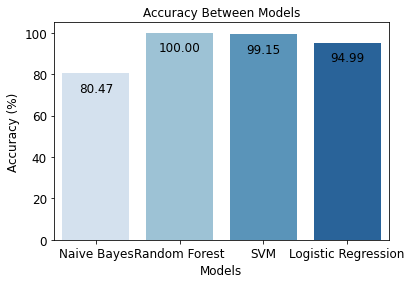

In [10]:
# rcParams['figure.figsize'] = (8,4)
ax = sns.barplot('model', 'mean', data=cv_result, capsize=.05, palette='Blues', ci=None)
ax.set_xlabel("Models",fontsize=12)
ax.set_ylabel("Accuracy (%)",fontsize=12)
ax.tick_params(labelsize=12)
ax.axes.set_title("Accuracy Between Models", fontsize=12)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=12, color='black', xytext=(0, -15),
    textcoords='offset points')

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



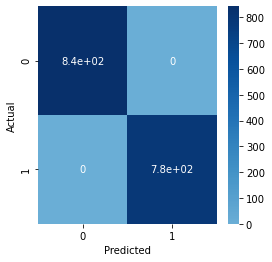

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=21, 
    stratify=y
)

def confusion_matrix_heatmap(cm, index, dim):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (dim, dim)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="Blues", center=0)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

prediction = search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
confusion_matrix_heatmap(confusion_matrix(y_test, prediction), search.classes_, 4)